loss 0.135, train acc 0.956, test acc 0.737
987.5 examples/sec on cuda:0


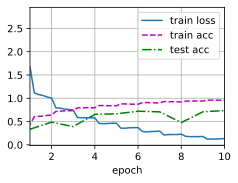

In [2]:
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

train_augs=torchvision.transforms.Compose([torchvision.transforms.RandomHorizontalFlip(),torchvision.transforms.ToTensor()])
test_augs=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

def load_cifar10(is_train,augs,batch_size):
    dataset=torchvision.datasets.CIFAR10(root='C:/Users/Administrator/Desktop/datasets/CIFAR10_download',transform=augs,train=is_train,download=False)
    dataloader=torch.utils.data.DataLoader(dataset,shuffle=is_train,batch_size=batch_size,num_workers=0)
    return dataloader

def init_weights(m):
    if m in [nn.Linear,nn.Conv2d]:
        nn.init.xavier_uniform_(m.weight)

batch_size=256
lr=0.05
num_epochs=10
resnet=d2l.resnet18(10,3)
train_iter=load_cifar10(True,train_augs,batch_size)
test_iter=load_cifar10(False,test_augs,batch_size)
resnet.apply(init_weights)

d2l.train_ch6 (resnet,train_iter,test_iter,10,0.1,"cuda:0")